In [1]:
import pandas as pd
import numpy as np
import hashlib as hl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/narayani/Desktop/IIITB/Sem6/ML/ML_Project/Housing_Logistic Regression/data/D3.csv')

In [3]:
data.head()

,Unnamed: 0,1,2,3,4,5,6,7
0,0,0.195798,0.274106,-0.939997,0.028068,0.044240,0.013813,1
1,1,0.309739,0.264959,-0.913133,0.002043,0.006119,0.002161,1
2,2,0.264859,0.245184,-0.918893,0.112745,0.106892,0.035098,0
3,3,0.337062,0.320293,-0.885321,0.001099,0.002505,0.001011,1
4,4,0.351365,0.304930,-0.885185,0.001344,0.002241,0.001036,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 8 columns):
Unnamed: 0    2254 non-null int64
1             2254 non-null float64
2             2254 non-null float64
3             2254 non-null float64
4             2254 non-null float64
5             2254 non-null float64
6             2254 non-null float64
7             2254 non-null int64
dtypes: float64(6), int64(2)
memory usage: 140.9 KB


In [5]:
filter_data = data.drop(data.columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a855f10>,
      dtype=object)

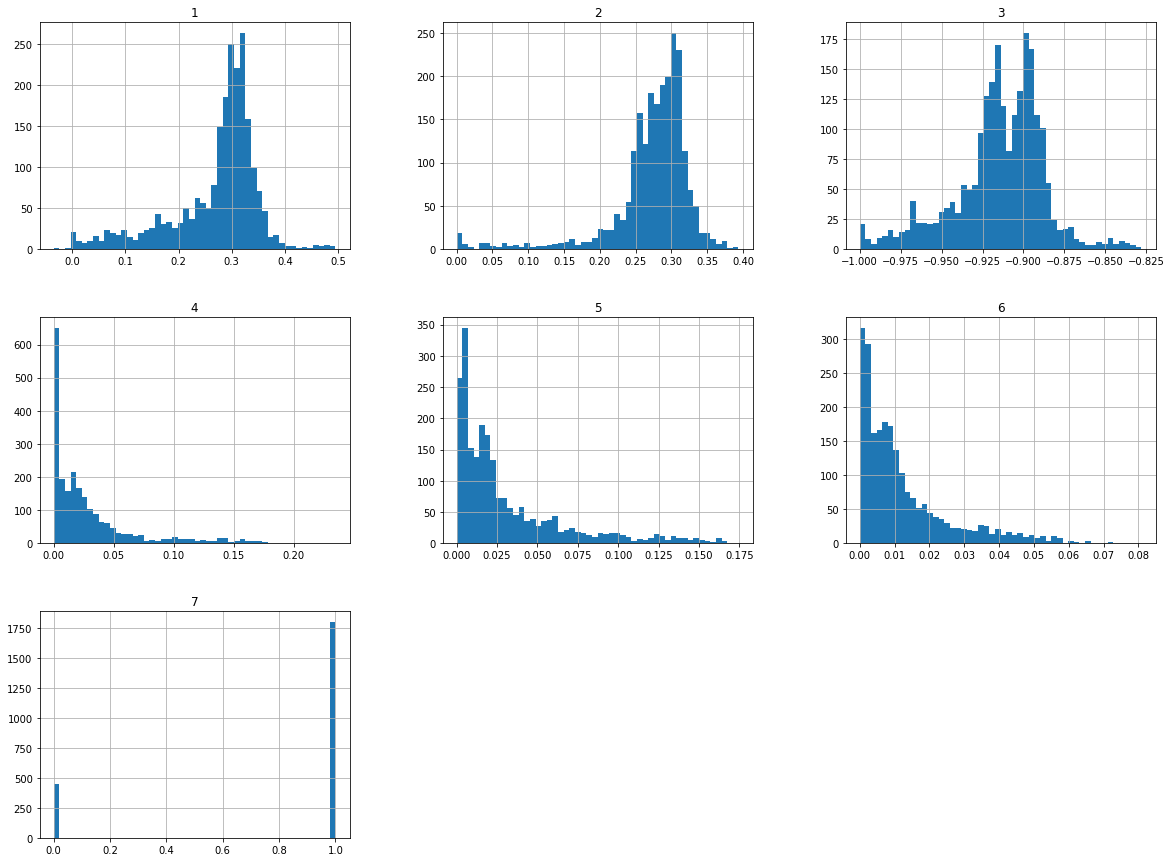

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
filter_data.hist(bins=50, figsize=(20,15))

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(filter_data, test_size=0.2, random_state = 42)

In [8]:
data1 = train_set.copy()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15bf1c50>,
      dtype=object)

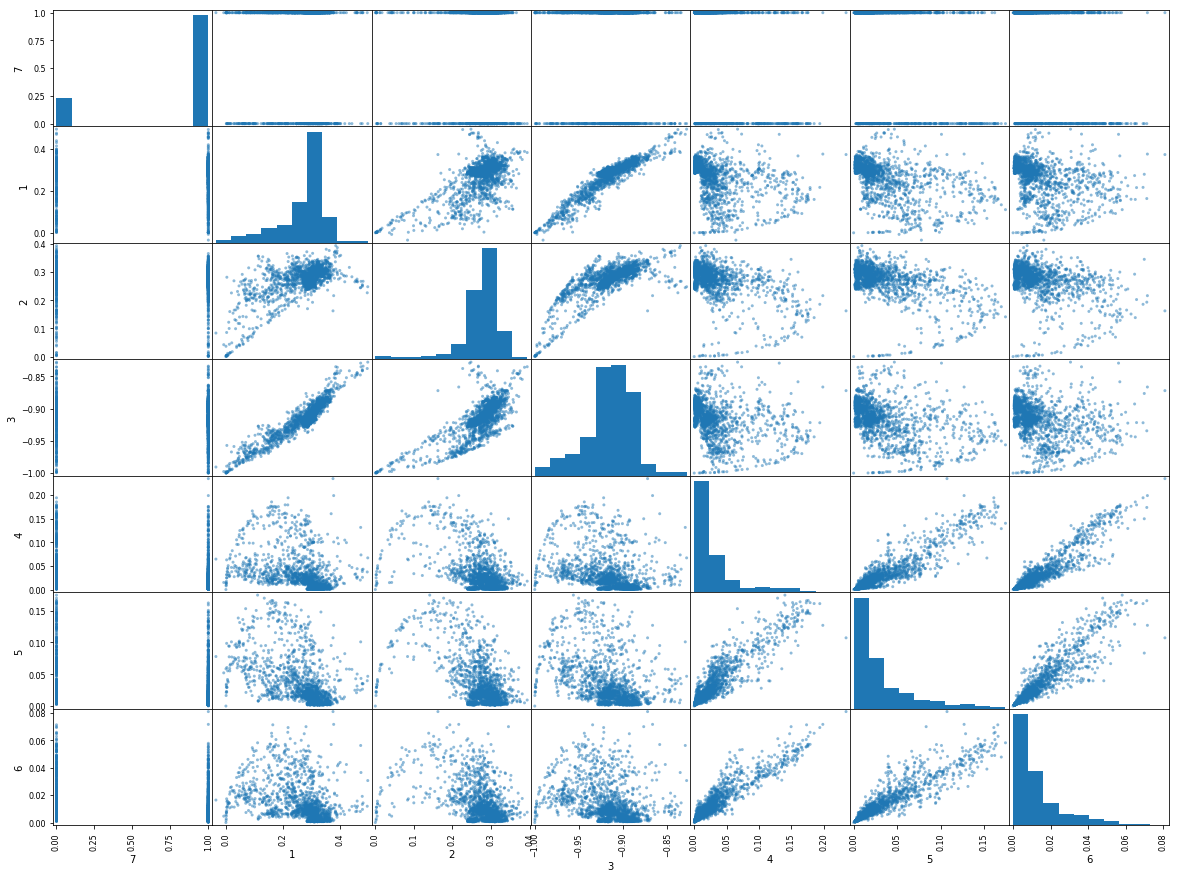

In [9]:
from pandas.tools.plotting import scatter_matrix

attributes = [ filter_data.columns[6],filter_data.columns[0],filter_data.columns[1],filter_data.columns[2],filter_data.columns[3],filter_data.columns[4],filter_data.columns[5]]
scatter_matrix(data1[attributes], figsize=(20, 15))

# logistic regression (library)

In [10]:
trainingSet = train_set.copy()
testSet = test_set.copy()

In [11]:
data.drop(data.columns[0], axis=1) # to drop the unnamed column from the data
X_train = trainingSet.drop(filter_data.columns[6], axis=1) # drop the target value 
X_train.head() # displays the first 5 rows of data

,1,2,3,4,5,6
121,0.271241,0.260111,-0.926360,0.016008,0.016808,0.009447
173,0.241139,0.242855,-0.934180,0.083019,0.040954,0.040147
1245,0.356147,0.307813,-0.882179,0.004772,0.011835,0.002933
1323,0.144759,0.276565,-0.949703,0.018757,0.015316,0.005849
999,0.234589,0.278184,-0.930823,0.023562,0.022967,0.008279


In [12]:
X_test = testSet.drop(filter_data.columns[6], axis=1) 

In [13]:
y_train = trainingSet[filter_data.columns[6]] 
y_train.head()

121     1
173     1
1245    1
1323    1
999     1
Name: 7, dtype: int64

In [14]:
y_test = testSet[filter_data.columns[6]] 

In [15]:
y_train_label = y_train.as_matrix() # to convert pandas to numpy array
y_test_label = y_test.as_matrix()

In [16]:
X_train_label = X_train.as_matrix()
X_test_label = X_test.as_matrix()

In [17]:
from sklearn.linear_model import LogisticRegression # importing library logistic regression module
logreg = LogisticRegression()

In [18]:
logreg.fit(X_train_label,y_train_label) # fitting the training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = logreg.predict(X_test_label) # predict the lable values for new dataset (i.e. test data) on the fitted model
len(y_pred)

451

In [20]:
y_pred_prob = logreg.predict_proba(X_test_label)[:,1] # storing the predicted probability of target value 1 for test data 
y_pred_prob

array([0.7227866 , 0.85472638, 0.84894459, 0.84857887, 0.50369718,
       0.8061373 , 0.8490412 , 0.80092531, 0.85315834, 0.77474025,
       0.84949316, 0.82761842, 0.83047321, 0.78071751, 0.85256294,
       0.75899321, 0.82385849, 0.85216773, 0.81112053, 0.49808401,
       0.82404612, 0.84992292, 0.71880311, 0.85263394, 0.7804375 ,
       0.84492688, 0.78472689, 0.83257825, 0.8438272 , 0.82774003,
       0.78395631, 0.85501224, 0.79863179, 0.82334184, 0.82625665,
       0.61860906, 0.78403589, 0.71684638, 0.85017284, 0.83623506,
       0.83077308, 0.85520236, 0.7258874 , 0.72382231, 0.85373325,
       0.84166085, 0.83019849, 0.84955865, 0.59759653, 0.84809954,
       0.80836718, 0.85203045, 0.82146106, 0.85374702, 0.8314503 ,
       0.84746427, 0.74549339, 0.77421605, 0.81455172, 0.85145991,
       0.82549382, 0.82441537, 0.77222031, 0.85191148, 0.78308047,
       0.8046516 , 0.83175434, 0.83902233, 0.4875289 , 0.73639091,
       0.84936259, 0.85089684, 0.65720832, 0.79547387, 0.82742

In [21]:
# to calculate the accuracy i.e (number of correct predictions/total number of predictions)*100
def getAccuracy(actual, predictions):
	correct = 0
	for x in range(len(actual)):
		if actual[x] == predictions[x]:
			correct += 1
	return (correct/float(len(actual)))

In [22]:
accuracy = getAccuracy(y_test_label,y_pred)

In [23]:
print ("Accuracy = " +str(accuracy))

Accuracy = 0.815964523282


In [24]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test_label,y_pred)
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [25]:
# Precision tells us that when a positive value is predicted, how often is the prediction incorrect
precision = (TP) / float(TP + FP)
print ("Precision = " + str(precision))

Precision = 0.8153153153153153


In [26]:
#recall(also known as sensitivity or true positive rate) tells us that when the actual value is positive, how often is the prediction correct.
recall = (TP) / float(TP + FN)
print ("Recall = " + str(recall))

Recall = 0.9972451790633609


In [27]:
#F-measure(also known as F1-score or balanced F-score) is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score.
#F-measure = 2*(precision*recall)/(precision+recall)
f_measure = 2* (precision*recall)/float((precision+recall))
print ("F-measure = " + str(f_measure))

F-measure = 0.8971499380421313


In [28]:
#AUC is the percentage of the ROC plot that is underneath the curve. AUC is useful as a single number summary of classifier performance 
auc = metrics.roc_auc_score(y_test_label,y_pred_prob)

In [29]:
print ("AUC = " + str(auc))

AUC = 0.7870961682945153
